In [293]:
!nvidia-smi

Sun Nov  9 07:19:46 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   68C    P0             30W /   70W |     254MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [294]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [295]:
import sklearn
print(sklearn.__version__)

1.6.1


In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [297]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [298]:
file_path1 = '/content/drive/MyDrive/train_FD003.txt'

In [299]:
file_path2 = '/content/drive/MyDrive/test_FD003.txt'

In [300]:
file_path3 = '/content/drive/MyDrive/RUL_FD003.txt'

In [301]:
column_names=['engine', 'cycles', 'setting1', 'setting2', 'setting3', 'Total temperature at fan inlet', 'Total temperature at LPC outlet', 'Total temperature at HPC outlet', 'Total temperature at LPT outlet', 'Pressure at fan inlet', 'Total pressure in bypass-duct', 'Total pressure at HPC outlet', 'Physical fan speed', 'Physical core speed', 'Engine pressure ratio (P50/P2)', 'Static pressure at HPC outlet', 'Ratio of fuel flow to Ps30', 'Corrected fan speed', 'Corrected core speed', 'Bypass Ratio', 'Burner fuel-air ratio', 'Bleed Enthalpy', 'Demanded fan speed', 'Demanded corrected fan speed', 'HPT coolant bleed', 'LPT coolant bleed']

In [302]:
train3 = pd.read_csv((file_path1) , sep='\s+', header = None, names = column_names)

In [303]:
train3

,engine,cycles,setting1,setting2,setting3,Total temperature at fan inlet,Total temperature at LPC outlet,Total temperature at HPC outlet,Total temperature at LPT outlet,Pressure at fan inlet,...,Ratio of fuel flow to Ps30,Corrected fan speed,Corrected core speed,Bypass Ratio,Burner fuel-air ratio,Bleed Enthalpy,Demanded fan speed,Demanded corrected fan speed,HPT coolant bleed,LPT coolant bleed
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,522.31,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,522.42,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,522.03,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,522.49,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,522.58,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,148,-0.0016,-0.0003,100.0,518.67,643.78,1596.01,1424.11,14.62,...,519.66,2388.30,8138.08,8.5036,0.03,394,2388,100.0,38.44,22.9631
24716,100,149,0.0034,-0.0003,100.0,518.67,643.29,1596.38,1429.14,14.62,...,519.91,2388.28,8144.36,8.5174,0.03,395,2388,100.0,38.50,22.9746
24717,100,150,-0.0016,0.0004,100.0,518.67,643.84,1604.53,1431.41,14.62,...,519.44,2388.24,8135.95,8.5223,0.03,396,2388,100.0,38.39,23.0682
24718,100,151,-0.0023,0.0004,100.0,518.67,643.94,1597.56,1426.57,14.62,...,520.01,2388.26,8141.24,8.5148,0.03,395,2388,100.0,38.31,23.0753


In [304]:
test3 = pd.read_csv((file_path2) , sep='\s+', header = None, names = column_names)

In [305]:
test3

,engine,cycles,setting1,setting2,setting3,Total temperature at fan inlet,Total temperature at LPC outlet,Total temperature at HPC outlet,Total temperature at LPT outlet,Pressure at fan inlet,...,Ratio of fuel flow to Ps30,Corrected fan speed,Corrected core speed,Bypass Ratio,Burner fuel-air ratio,Bleed Enthalpy,Demanded fan speed,Demanded corrected fan speed,HPT coolant bleed,LPT coolant bleed
0,1,1,-0.0017,-0.0004,100.0,518.67,641.94,1581.93,1396.93,14.62,...,521.89,2387.94,8133.48,8.3760,0.03,391,2388,100.0,39.07,23.4468
1,1,2,0.0006,-0.0002,100.0,518.67,642.02,1584.86,1398.90,14.62,...,521.85,2388.01,8137.44,8.4062,0.03,391,2388,100.0,39.04,23.4807
2,1,3,0.0014,-0.0003,100.0,518.67,641.68,1581.78,1391.92,14.62,...,522.10,2387.94,8138.25,8.3553,0.03,391,2388,100.0,39.10,23.4244
3,1,4,0.0027,0.0001,100.0,518.67,642.20,1584.53,1395.34,14.62,...,522.45,2387.96,8137.07,8.3709,0.03,392,2388,100.0,38.97,23.4782
4,1,5,-0.0001,0.0001,100.0,518.67,642.46,1589.03,1395.86,14.62,...,521.91,2387.97,8134.20,8.4146,0.03,391,2388,100.0,39.09,23.3950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16591,100,243,0.0011,-0.0003,100.0,518.67,643.04,1594.99,1411.28,14.62,...,529.23,2388.24,8162.24,8.2939,0.03,395,2388,100.0,39.40,23.4949
16592,100,244,-0.0024,0.0002,100.0,518.67,642.47,1591.27,1417.64,14.62,...,529.27,2388.26,8163.24,8.3247,0.03,394,2388,100.0,39.42,23.6011
16593,100,245,-0.0053,0.0002,100.0,518.67,642.70,1593.81,1412.70,14.62,...,529.48,2388.28,8162.12,8.3264,0.03,394,2388,100.0,39.43,23.5482
16594,100,246,-0.0006,0.0001,100.0,518.67,642.19,1595.63,1406.58,14.62,...,529.39,2388.33,8164.20,8.2908,0.03,395,2388,100.0,39.40,23.6687


In [306]:
rul = pd.read_csv((file_path3) , sep='\s+', header = None, names = ['RUL'])

In [307]:
rul

,RUL
0,44
1,51
2,27
3,120
4,101
...,...
95,113
96,123
97,17
98,8


In [308]:
rul['RUL'].describe()

,RUL
count,100.000000
mean,75.320000
std,41.604166
min,6.000000
25%,43.250000
50%,77.500000
75%,115.000000
max,145.000000


In [309]:
train3.describe().T

,count,mean,std,min,25%,50%,75%,max
engine,24720.0,48.631877,2.934899e+01,1.0000,23.0000,47.0000,74.0000,100.0000
cycles,24720.0,139.077063,9.884668e+01,1.0000,62.0000,124.0000,191.0000,525.0000
setting1,24720.0,-0.000024,2.193545e-03,-0.0086,-0.0015,-0.0000,0.0015,0.0086
setting2,24720.0,0.000005,2.940429e-04,-0.0006,-0.0002,-0.0000,0.0003,0.0007
setting3,24720.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
Total temperature at fan inlet,24720.0,518.670000,6.684921e-11,518.6700,518.6700,518.6700,518.6700,518.6700
Total temperature at LPC outlet,24720.0,642.457858,5.230311e-01,640.8400,642.0800,642.4000,642.7900,645.1100
Total temperature at HPC outlet,24720.0,1588.079175,6.810418e+00,1564.3000,1583.2800,1587.5200,1592.4125,1615.3900
Total temperature at LPT outlet,24720.0,1404.471212,9.773178e+00,1377.0600,1397.1875,1402.9100,1410.6000,1441.1600
Pressure at fan inlet,24720.0,14.620000,3.602525e-12,14.6200,14.6200,14.6200,14.6200,14.6200


In [310]:
test3.describe().T

,count,mean,std,min,25%,50%,75%,max
engine,16596.0,51.887383,2.985352e+01,1.0000,24.0000,52.0000,78.000000,100.0000
cycles,16596.0,105.999518,8.328690e+01,1.0000,42.0000,87.0000,149.000000,475.0000
setting1,16596.0,-0.000017,2.201359e-03,-0.0087,-0.0015,0.0000,0.001500,0.0083
setting2,16596.0,-0.000004,2.941945e-04,-0.0006,-0.0003,0.0000,0.000300,0.0006
setting3,16596.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.000000,100.0000
Total temperature at fan inlet,16596.0,518.670000,6.309810e-11,518.6700,518.6700,518.6700,518.670000,518.6700
Total temperature at LPC outlet,16596.0,642.267980,4.188497e-01,640.9100,641.9800,642.2400,642.550000,644.0300
Total temperature at HPC outlet,16596.0,1585.608286,5.538577e+00,1565.0800,1581.8475,1585.4600,1589.240000,1607.1300
Total temperature at LPT outlet,16596.0,1400.567943,7.150365e+00,1379.3800,1395.4400,1399.8400,1405.230000,1430.2100
Pressure at fan inlet,16596.0,14.620000,3.089178e-12,14.6200,14.6200,14.6200,14.620000,14.6200


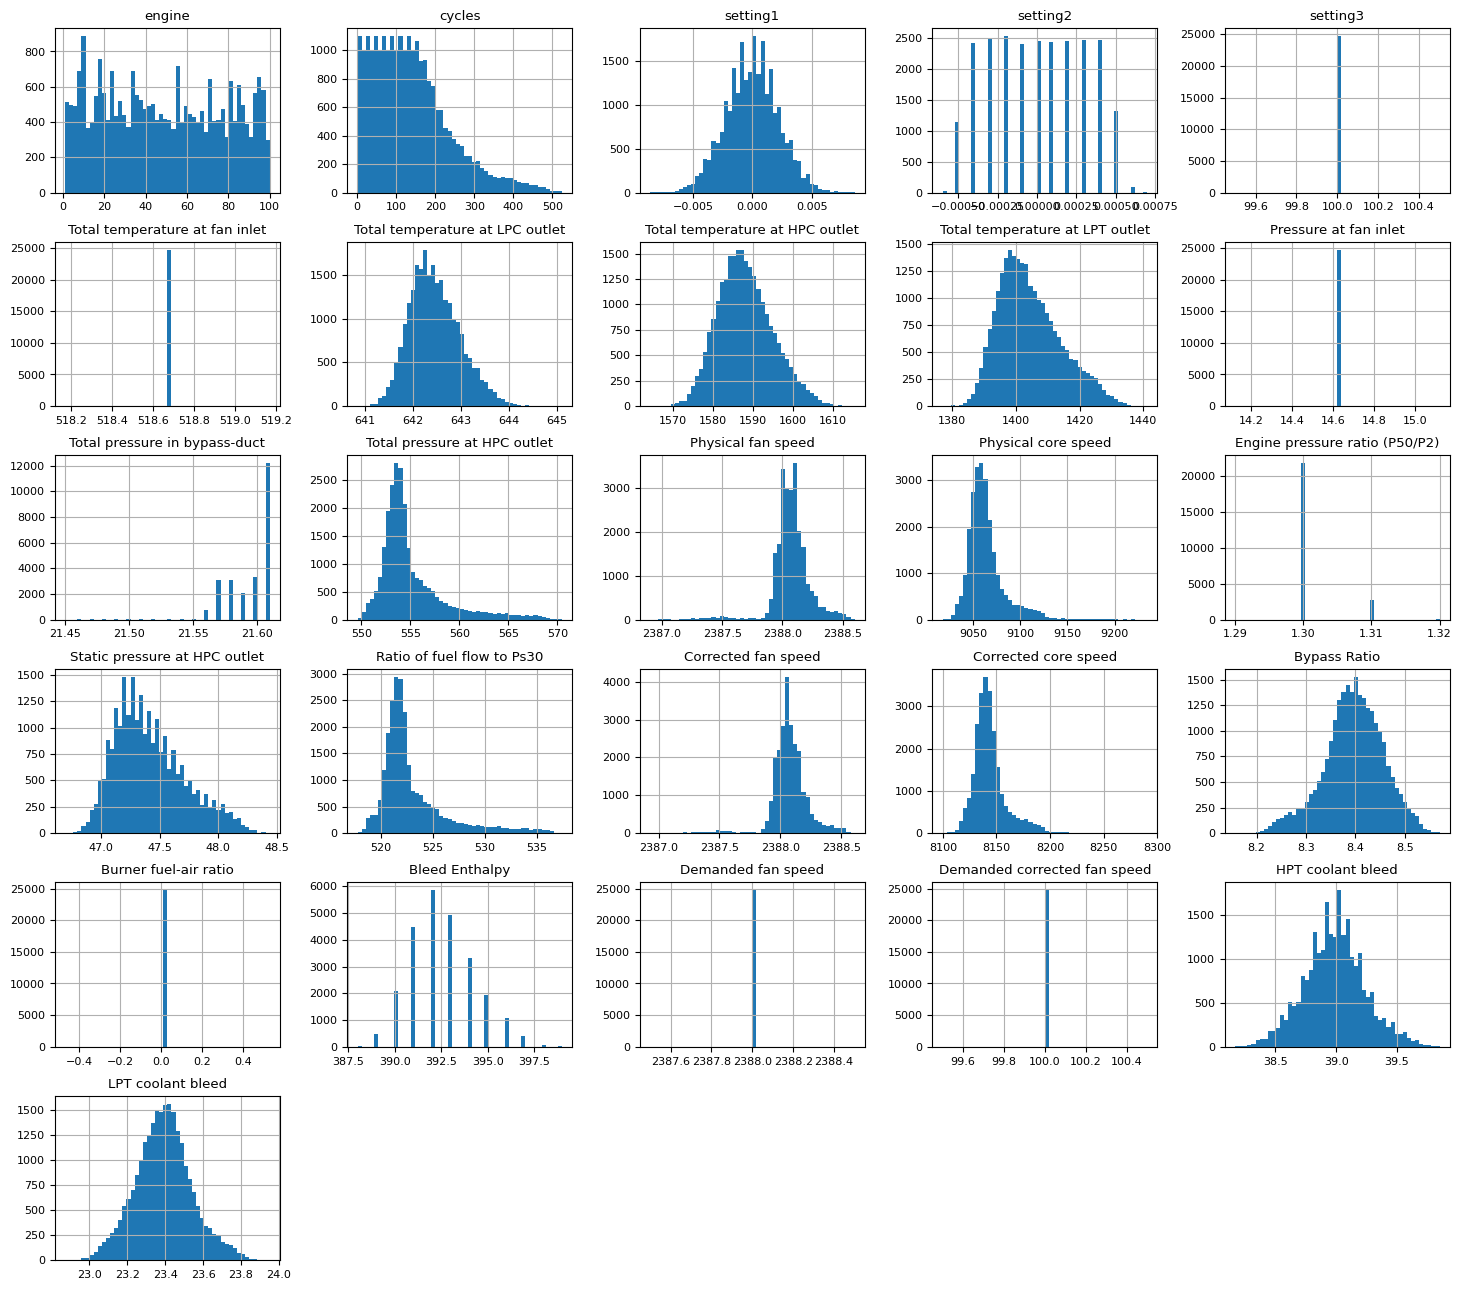

In [311]:
train3.hist(bins=50, figsize=(18,16))
plt.show()

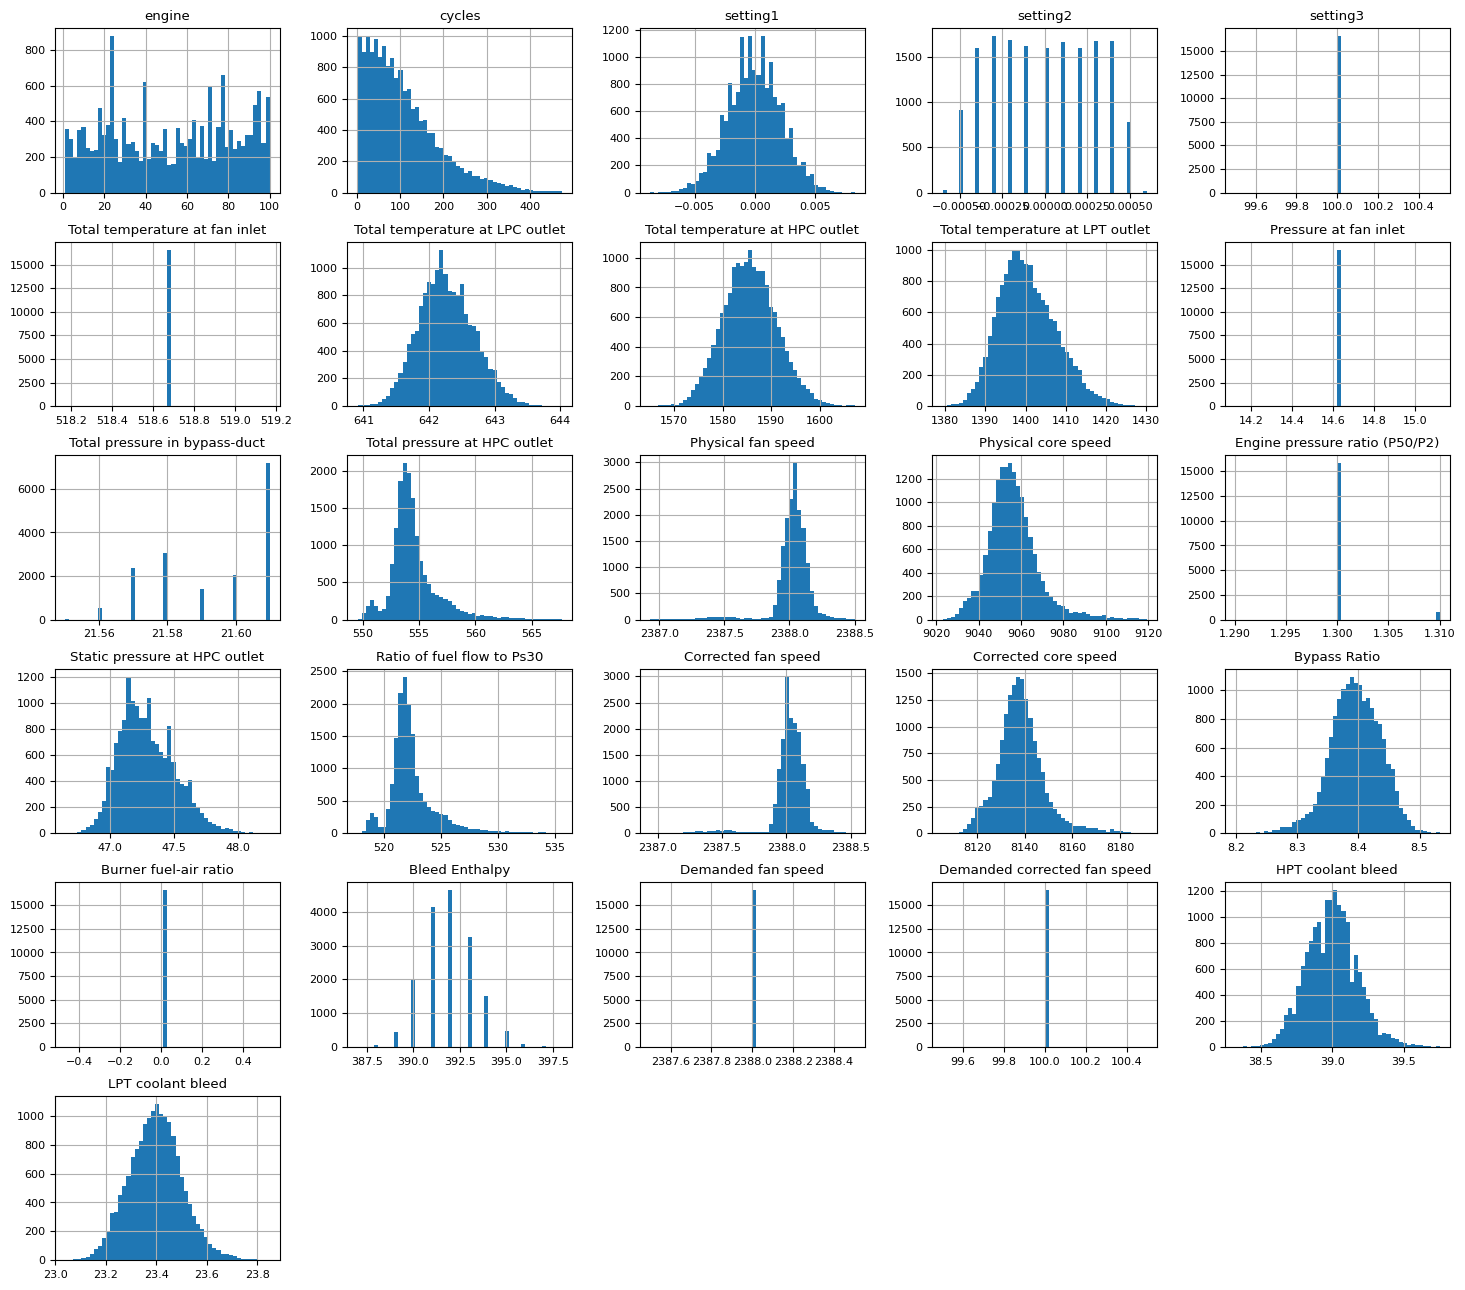

In [312]:
test3.hist(bins=50, figsize=(18,16))
plt.show()

In [313]:
sens_const_values = ['setting3', 'Total temperature at fan inlet', 'Pressure at fan inlet', 'Engine pressure ratio (P50/P2)', 'Burner fuel-air ratio', 'Demanded fan speed', 'Demanded corrected fan speed']

In [314]:
train3.drop(sens_const_values, axis=1, inplace=True)

In [315]:
test3.drop(sens_const_values, axis=1, inplace=True)

In [316]:
train3

,engine,cycles,setting1,setting2,Total temperature at LPC outlet,Total temperature at HPC outlet,Total temperature at LPT outlet,Total pressure in bypass-duct,Total pressure at HPC outlet,Physical fan speed,Physical core speed,Static pressure at HPC outlet,Ratio of fuel flow to Ps30,Corrected fan speed,Corrected core speed,Bypass Ratio,Bleed Enthalpy,HPT coolant bleed,LPT coolant bleed
0,1,1,-0.0005,0.0004,642.36,1583.23,1396.84,21.61,553.97,2387.96,9062.17,47.30,522.31,2388.01,8145.32,8.4246,391,39.11,23.3537
1,1,2,0.0008,-0.0003,642.50,1584.69,1396.89,21.61,554.55,2388.00,9061.78,47.23,522.42,2388.03,8152.85,8.4403,392,38.99,23.4491
2,1,3,-0.0014,-0.0002,642.18,1582.35,1405.61,21.61,554.43,2388.03,9070.23,47.22,522.03,2388.00,8150.17,8.3901,391,38.85,23.3669
3,1,4,-0.0020,0.0001,642.92,1585.61,1392.27,21.61,555.21,2388.00,9064.57,47.24,522.49,2388.08,8146.56,8.3878,392,38.96,23.2951
4,1,5,0.0016,0.0000,641.68,1588.63,1397.65,21.61,554.74,2388.04,9076.14,47.15,522.58,2388.03,8147.80,8.3869,392,39.14,23.4583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,148,-0.0016,-0.0003,643.78,1596.01,1424.11,21.61,551.86,2388.25,9070.82,48.27,519.66,2388.30,8138.08,8.5036,394,38.44,22.9631
24716,100,149,0.0034,-0.0003,643.29,1596.38,1429.14,21.61,551.86,2388.23,9064.60,48.13,519.91,2388.28,8144.36,8.5174,395,38.50,22.9746
24717,100,150,-0.0016,0.0004,643.84,1604.53,1431.41,21.61,551.30,2388.25,9063.45,48.18,519.44,2388.24,8135.95,8.5223,396,38.39,23.0682
24718,100,151,-0.0023,0.0004,643.94,1597.56,1426.57,21.61,550.69,2388.26,9062.22,48.05,520.01,2388.26,8141.24,8.5148,395,38.31,23.0753


In [317]:
train3.isnull().sum()

,0
engine,0
cycles,0
setting1,0
setting2,0
Total temperature at LPC outlet,0
Total temperature at HPC outlet,0
Total temperature at LPT outlet,0
Total pressure in bypass-duct,0
Total pressure at HPC outlet,0
Physical fan speed,0


In [318]:
test3.isnull().sum()

,0
engine,0
cycles,0
setting1,0
setting2,0
Total temperature at LPC outlet,0
Total temperature at HPC outlet,0
Total temperature at LPT outlet,0
Total pressure in bypass-duct,0
Total pressure at HPC outlet,0
Physical fan speed,0


In [319]:
test3

,engine,cycles,setting1,setting2,Total temperature at LPC outlet,Total temperature at HPC outlet,Total temperature at LPT outlet,Total pressure in bypass-duct,Total pressure at HPC outlet,Physical fan speed,Physical core speed,Static pressure at HPC outlet,Ratio of fuel flow to Ps30,Corrected fan speed,Corrected core speed,Bypass Ratio,Bleed Enthalpy,HPT coolant bleed,LPT coolant bleed
0,1,1,-0.0017,-0.0004,641.94,1581.93,1396.93,21.58,554.56,2387.93,9048.65,47.09,521.89,2387.94,8133.48,8.3760,391,39.07,23.4468
1,1,2,0.0006,-0.0002,642.02,1584.86,1398.90,21.58,554.10,2387.94,9046.53,47.08,521.85,2388.01,8137.44,8.4062,391,39.04,23.4807
2,1,3,0.0014,-0.0003,641.68,1581.78,1391.92,21.58,554.41,2387.97,9054.92,47.15,522.10,2387.94,8138.25,8.3553,391,39.10,23.4244
3,1,4,0.0027,0.0001,642.20,1584.53,1395.34,21.59,554.58,2387.94,9055.04,47.26,522.45,2387.96,8137.07,8.3709,392,38.97,23.4782
4,1,5,-0.0001,0.0001,642.46,1589.03,1395.86,21.58,554.16,2388.01,9048.59,46.94,521.91,2387.97,8134.20,8.4146,391,39.09,23.3950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16591,100,243,0.0011,-0.0003,643.04,1594.99,1411.28,21.58,561.21,2388.24,9088.31,47.61,529.23,2388.24,8162.24,8.2939,395,39.40,23.4949
16592,100,244,-0.0024,0.0002,642.47,1591.27,1417.64,21.58,561.02,2388.29,9085.35,47.75,529.27,2388.26,8163.24,8.3247,394,39.42,23.6011
16593,100,245,-0.0053,0.0002,642.70,1593.81,1412.70,21.58,561.16,2388.23,9084.29,47.60,529.48,2388.28,8162.12,8.3264,394,39.43,23.5482
16594,100,246,-0.0006,0.0001,642.19,1595.63,1406.58,21.58,562.66,2388.24,9092.52,47.69,529.39,2388.33,8164.20,8.2908,395,39.40,23.6687


In [320]:
# ============================
# 2. Add RUL labels
# ============================

# --- TRAIN ---
rul_train3 = train3.groupby("engine")["cycles"].max().reset_index()
rul_train3.columns = ["engine", "max_cycles"]

train3 = train3.merge(rul_train3, on="engine", how="left")
train3["RUL"] = train3["max_cycles"] - train3["cycles"]
train3.drop("max_cycles", axis=1, inplace=True)



In [321]:
# Test
rul_test3 = test3.groupby("engine")["cycles"].max().reset_index()
rul_test3.columns = ["engine", "last_cycles"]
rul_test3 = rul_test3.merge(rul, left_index=True, right_index=True)
rul_test3["max_cycles"] = rul_test3["last_cycles"] + rul_test3["RUL"]
test3 = test3.merge(rul_test3[["engine", "max_cycles"]], on="engine", how="left")
test3["RUL"] = test3["max_cycles"] - test3["cycles"]
test3.drop("max_cycles", axis=1, inplace=True)

In [322]:
train3

,engine,cycles,setting1,setting2,Total temperature at LPC outlet,Total temperature at HPC outlet,Total temperature at LPT outlet,Total pressure in bypass-duct,Total pressure at HPC outlet,Physical fan speed,Physical core speed,Static pressure at HPC outlet,Ratio of fuel flow to Ps30,Corrected fan speed,Corrected core speed,Bypass Ratio,Bleed Enthalpy,HPT coolant bleed,LPT coolant bleed,RUL
0,1,1,-0.0005,0.0004,642.36,1583.23,1396.84,21.61,553.97,2387.96,9062.17,47.30,522.31,2388.01,8145.32,8.4246,391,39.11,23.3537,258
1,1,2,0.0008,-0.0003,642.50,1584.69,1396.89,21.61,554.55,2388.00,9061.78,47.23,522.42,2388.03,8152.85,8.4403,392,38.99,23.4491,257
2,1,3,-0.0014,-0.0002,642.18,1582.35,1405.61,21.61,554.43,2388.03,9070.23,47.22,522.03,2388.00,8150.17,8.3901,391,38.85,23.3669,256
3,1,4,-0.0020,0.0001,642.92,1585.61,1392.27,21.61,555.21,2388.00,9064.57,47.24,522.49,2388.08,8146.56,8.3878,392,38.96,23.2951,255
4,1,5,0.0016,0.0000,641.68,1588.63,1397.65,21.61,554.74,2388.04,9076.14,47.15,522.58,2388.03,8147.80,8.3869,392,39.14,23.4583,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,148,-0.0016,-0.0003,643.78,1596.01,1424.11,21.61,551.86,2388.25,9070.82,48.27,519.66,2388.30,8138.08,8.5036,394,38.44,22.9631,4
24716,100,149,0.0034,-0.0003,643.29,1596.38,1429.14,21.61,551.86,2388.23,9064.60,48.13,519.91,2388.28,8144.36,8.5174,395,38.50,22.9746,3
24717,100,150,-0.0016,0.0004,643.84,1604.53,1431.41,21.61,551.30,2388.25,9063.45,48.18,519.44,2388.24,8135.95,8.5223,396,38.39,23.0682,2
24718,100,151,-0.0023,0.0004,643.94,1597.56,1426.57,21.61,550.69,2388.26,9062.22,48.05,520.01,2388.26,8141.24,8.5148,395,38.31,23.0753,1


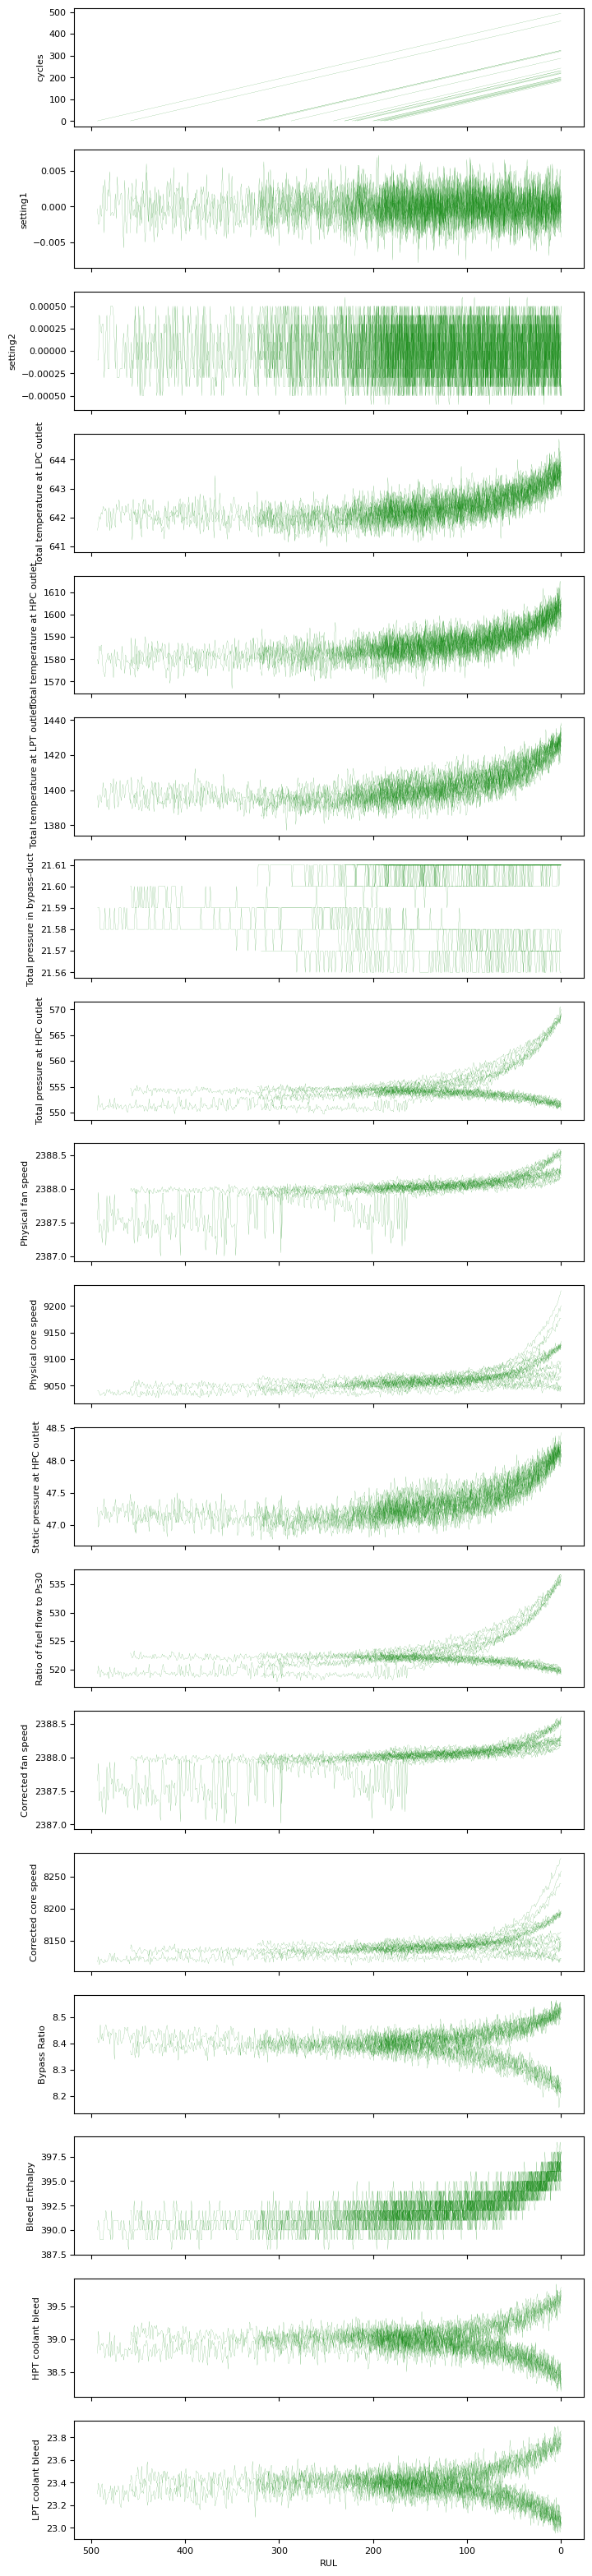

In [323]:
plt.rcParams['figure.figsize'] = 8,40
plt.rcParams['font.size'] = 8
plt.rcParams['lines.linewidth'] = 0.1

plot_items = list(train3.columns)[1:-1]
fig, ax = plt.subplots(len(plot_items),sharex = True)
ax[0].invert_xaxis()

engines= list(train3['engine'].unique())

for engine in engines [20:40]:
  for i, item in enumerate(plot_items):
    f = sns.lineplot(data = train3[train3['engine']==engine], x='RUL', y=item, color='green',ax=ax[i])


In [324]:
RUL_cap = 130
train3["RUL"] = np.where(train3["RUL"] > RUL_cap, RUL_cap, train3["RUL"])
test3["RUL"] = np.where(test3["RUL"] > RUL_cap, RUL_cap, test3["RUL"])

In [325]:
train3

,engine,cycles,setting1,setting2,Total temperature at LPC outlet,Total temperature at HPC outlet,Total temperature at LPT outlet,Total pressure in bypass-duct,Total pressure at HPC outlet,Physical fan speed,Physical core speed,Static pressure at HPC outlet,Ratio of fuel flow to Ps30,Corrected fan speed,Corrected core speed,Bypass Ratio,Bleed Enthalpy,HPT coolant bleed,LPT coolant bleed,RUL
0,1,1,-0.0005,0.0004,642.36,1583.23,1396.84,21.61,553.97,2387.96,9062.17,47.30,522.31,2388.01,8145.32,8.4246,391,39.11,23.3537,130
1,1,2,0.0008,-0.0003,642.50,1584.69,1396.89,21.61,554.55,2388.00,9061.78,47.23,522.42,2388.03,8152.85,8.4403,392,38.99,23.4491,130
2,1,3,-0.0014,-0.0002,642.18,1582.35,1405.61,21.61,554.43,2388.03,9070.23,47.22,522.03,2388.00,8150.17,8.3901,391,38.85,23.3669,130
3,1,4,-0.0020,0.0001,642.92,1585.61,1392.27,21.61,555.21,2388.00,9064.57,47.24,522.49,2388.08,8146.56,8.3878,392,38.96,23.2951,130
4,1,5,0.0016,0.0000,641.68,1588.63,1397.65,21.61,554.74,2388.04,9076.14,47.15,522.58,2388.03,8147.80,8.3869,392,39.14,23.4583,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,148,-0.0016,-0.0003,643.78,1596.01,1424.11,21.61,551.86,2388.25,9070.82,48.27,519.66,2388.30,8138.08,8.5036,394,38.44,22.9631,4
24716,100,149,0.0034,-0.0003,643.29,1596.38,1429.14,21.61,551.86,2388.23,9064.60,48.13,519.91,2388.28,8144.36,8.5174,395,38.50,22.9746,3
24717,100,150,-0.0016,0.0004,643.84,1604.53,1431.41,21.61,551.30,2388.25,9063.45,48.18,519.44,2388.24,8135.95,8.5223,396,38.39,23.0682,2
24718,100,151,-0.0023,0.0004,643.94,1597.56,1426.57,21.61,550.69,2388.26,9062.22,48.05,520.01,2388.26,8141.24,8.5148,395,38.31,23.0753,1


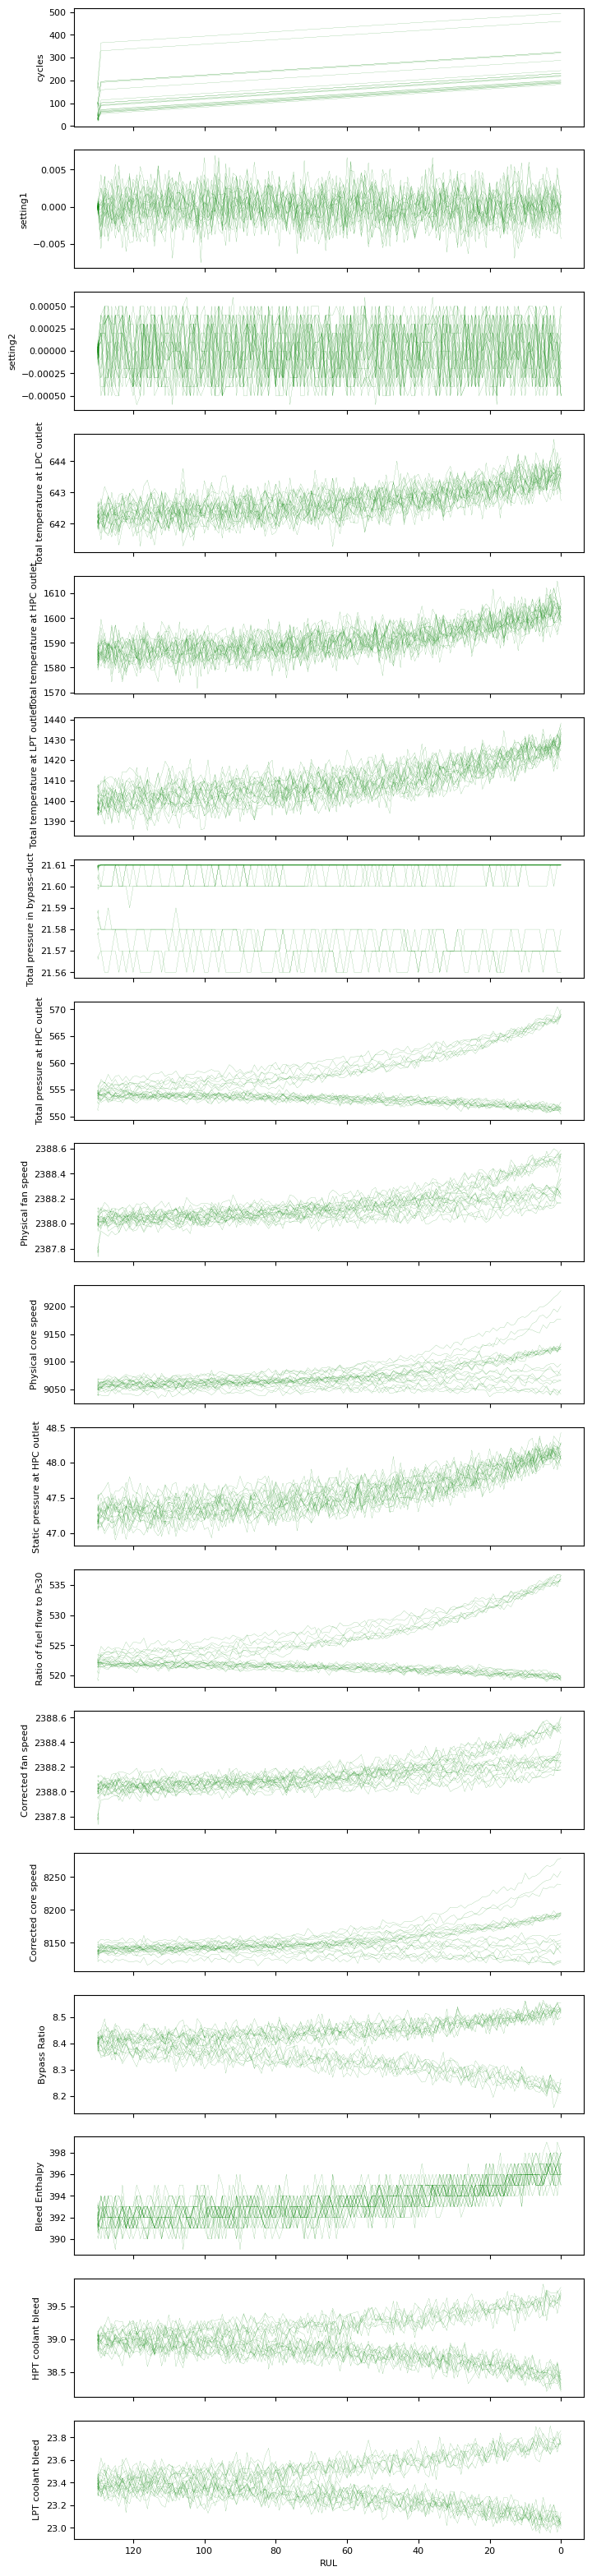

In [326]:
plt.rcParams['figure.figsize'] = 8,40
plt.rcParams['font.size'] = 8
plt.rcParams['lines.linewidth'] = 0.1

plot_items = list(train3.columns)[1:-1]
fig, ax = plt.subplots(len(plot_items),sharex = True)
ax[0].invert_xaxis()

engines= list(train3['engine'].unique())

for engine in engines [20:40]:
  for i, item in enumerate(plot_items):
    f = sns.lineplot(data = train3[train3['engine']==engine], x='RUL', y=item, color='green',ax=ax[i])


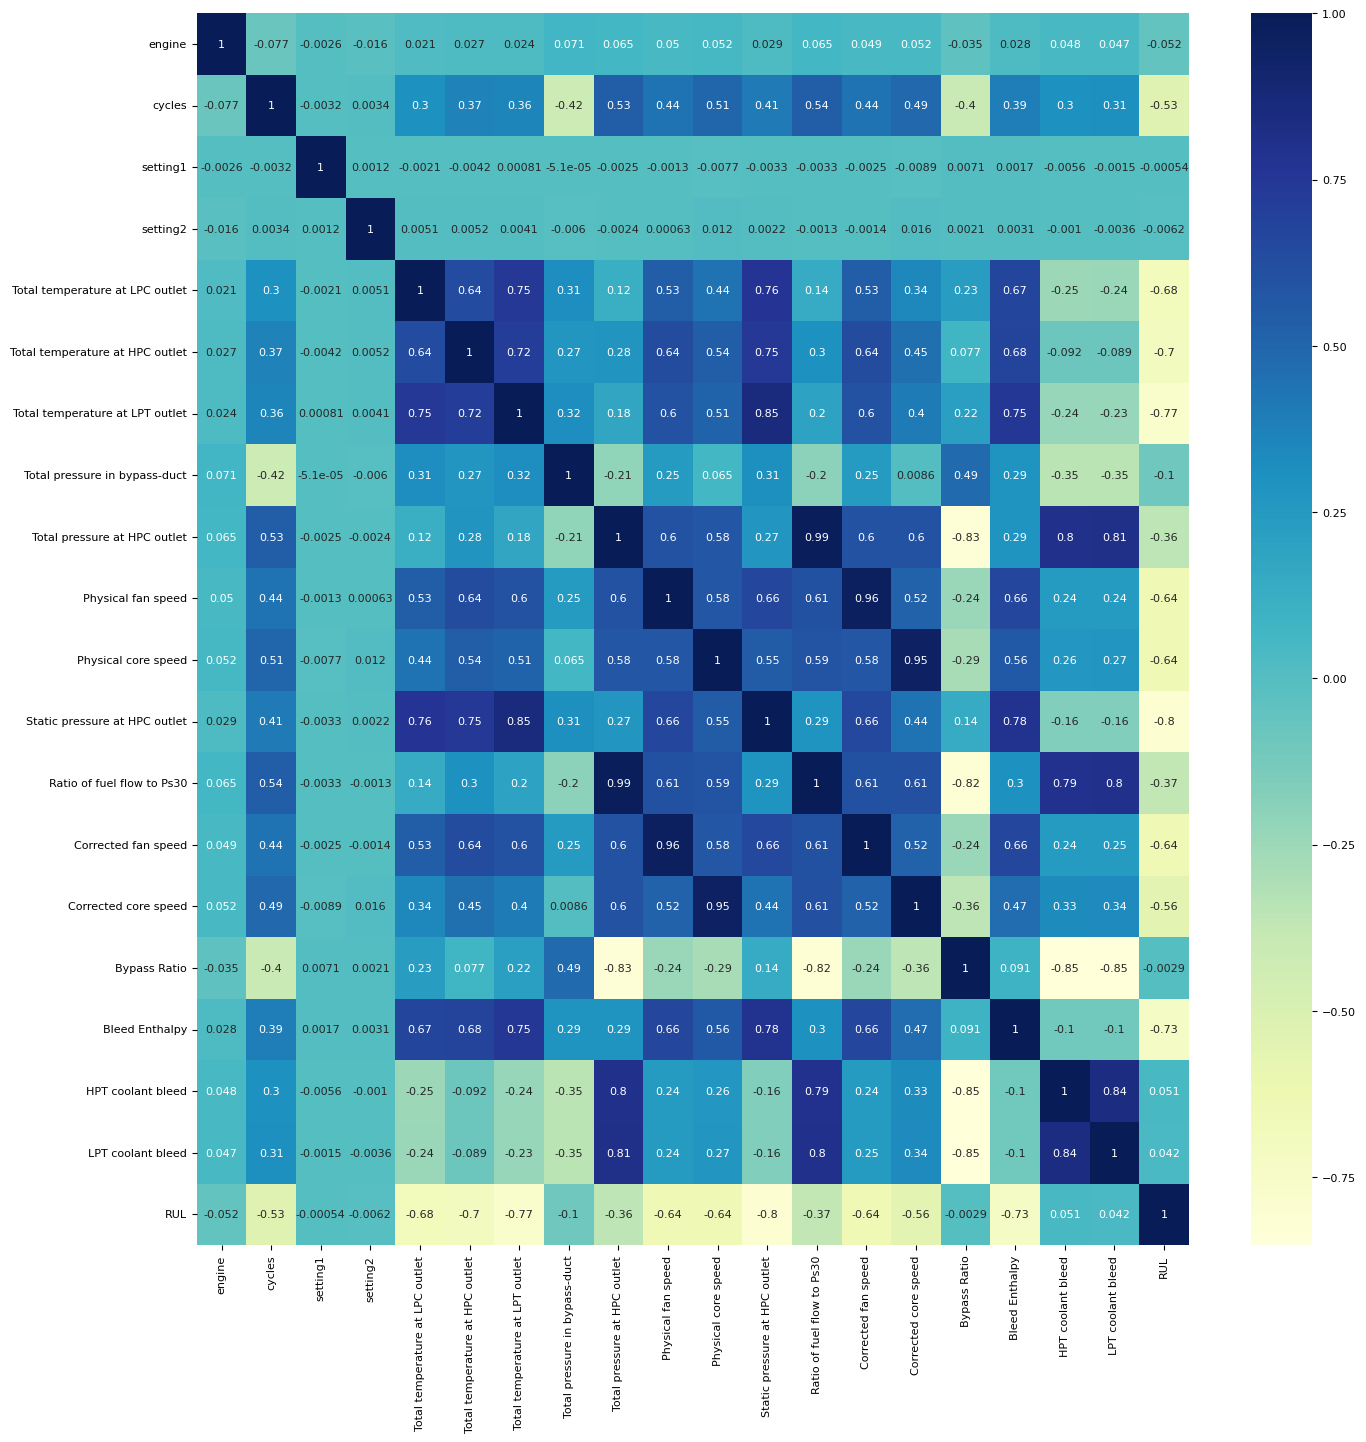

In [327]:
corr = train3.corr()
f, ax = plt.subplots(figsize=(16,16))
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True )

In [328]:
# Based on literature, these sensors are useful for FD001
useful_sensors = ['setting1', 'setting2', 'Total temperature at LPC outlet', 'Total temperature at HPC outlet', 'Total temperature at LPT outlet', 'Total pressure in bypass-duct', 'Total pressure at HPC outlet', 'Physical fan speed', 'Physical core speed', 'Static pressure at HPC outlet', 'Ratio of fuel flow to Ps30', 'Corrected fan speed', 'Corrected core speed', 'Bypass Ratio',  'Bleed Enthalpy', 'HPT coolant bleed', 'LPT coolant bleed']
feature_cols = useful_sensors

In [329]:
scaler = MinMaxScaler()
train3[feature_cols] = scaler.fit_transform(train3[feature_cols])
test3[feature_cols] = scaler.transform(test3[feature_cols])

In [330]:
def create_sequences(df, window_size=30):
    X, y = [], []
    for eng in df["engine"].unique():  # replaced 'unit' with 'engine'
        eng_df = df[df["engine"] == eng]
        eng_features = eng_df[feature_cols].values
        eng_rul = eng_df["RUL"].values
        for i in range(len(eng_df) - window_size + 1):
            X.append(eng_features[i:i+window_size])
            y.append(eng_rul[i+window_size-1])  # predict RUL at end of window
    return np.array(X), np.array(y)

# Example usage
window_size = 30
X_train, y_train = create_sequences(train3, window_size)
X_test, y_test = create_sequences(test3, window_size)

print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)

X_train: (21820, 30, 17) y_train: (21820,)
X_test: (13696, 30, 17) y_test: (13696,)


In [331]:
from tensorflow.keras.layers import Bidirectional, Input, Layer
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K

In [332]:
# Custom Attention Layer

class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                                 initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1),
                                 initializer="zeros")
        super(Attention, self).build(input_shape)

    def call(self, x):
        # Compute attention scores
        e = K.tanh(K.dot(x, self.W) + self.b)
        e = K.squeeze(e, axis=-1)
        alpha = K.softmax(e)
        alpha = K.expand_dims(alpha, axis=-1)
        context = x * alpha
        return K.sum(context, axis=1)

In [333]:
# BiLSTM + Attention model
def build_bilstm_attention(window_size, n_features):
    inputs = Input(shape=(window_size, n_features))
    x = Bidirectional(LSTM(64, return_sequences=True))(inputs)
    x = Dropout(0.3)(x)
    x = Bidirectional(LSTM(32, return_sequences=True))(x)
    x = Dropout(0.3)(x)
    x = Attention()(x)   # attention over time steps
    x = Dense(32, activation="relu")(x)
    x = Dropout(0.2)(x)
    outputs = Dense(1)(x)
    model = Model(inputs, outputs)
    model.compile(optimizer="adam", loss="mse")
    return model


In [334]:
# Train BiLSTM+Attention
model = build_bilstm_attention(window_size, len(feature_cols))

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    verbose=1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
    ]
)

Epoch 1/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 6461.0762 - val_loss: 1884.4015
Epoch 2/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 2005.9725 - val_loss: 1882.0350
Epoch 3/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 1998.1847 - val_loss: 1885.1613
Epoch 4/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 2016.1881 - val_loss: 1884.2450
Epoch 5/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 1981.6357 - val_loss: 706.9125
Epoch 6/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 736.9801 - val_loss: 357.9581
Epoch 7/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 486.2387 - val_loss: 251.5230
Epoch 8/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 432.0225 - val_loss: 221.4784
Epoch 9/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 401.0194 - val_loss: 221.5841
Epoch 10/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 376.0457 - val_loss: 205.9458
Epoch 11/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 381.2953 - val_los

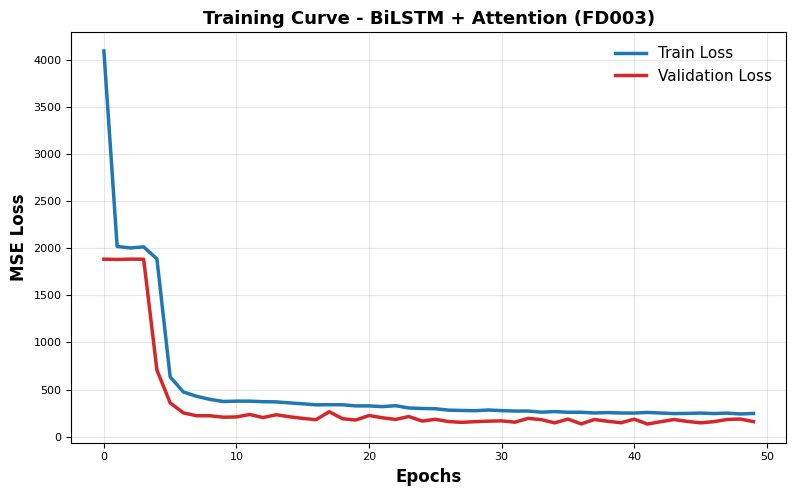

In [335]:
plt.figure(figsize=(8,5))

plt.plot(history.history["loss"], color="#1f77b4", linewidth=2.5, label="Train Loss")      # deep blue
plt.plot(history.history["val_loss"], color="#d62728", linewidth=2.5, label="Validation Loss")  # deep red

plt.xlabel("Epochs", fontsize=12, fontweight='bold')
plt.ylabel("MSE Loss", fontsize=12, fontweight='bold')
plt.title("Training Curve - BiLSTM + Attention (FD003)", fontsize=13, fontweight='bold')

plt.legend(frameon=False, fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [336]:
# Evaluation
y_pred = model.predict(X_test).flatten()
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n BiLSTM+Attention on FD003 → RMSE={rmse:.2f}, R²={r2:.4f}")

428/428 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

 BiLSTM+Attention on FD003 → RMSE=12.98, R²=0.7911


Test RMSE: 12.98
Test R²: 0.7911


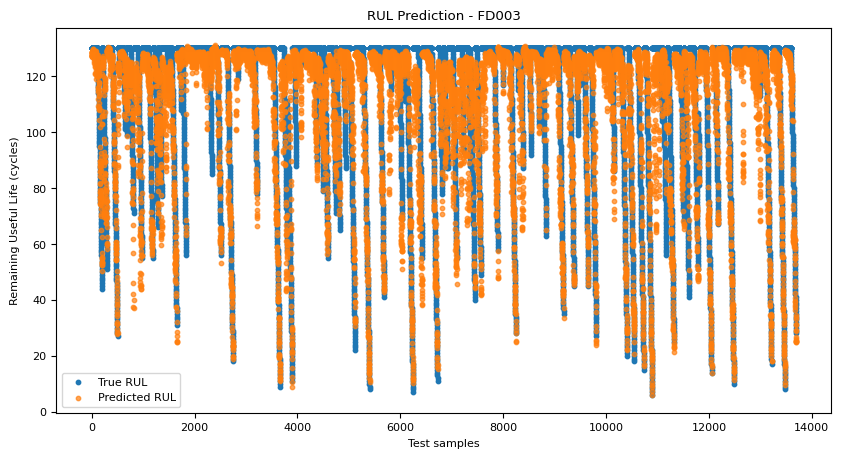

In [337]:
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R²: {r2:.4f}")

# 7. Plot Predictions vs True

plt.figure(figsize=(10,5))
plt.scatter(range(len(y_test)), y_test, label="True RUL", s=10)
plt.scatter(range(len(y_pred)), y_pred, label="Predicted RUL", s=10, alpha=0.7)
plt.title("RUL Prediction - FD003")
plt.xlabel("Test samples")
plt.ylabel("Remaining Useful Life (cycles)")
plt.legend()
plt.show()

THE END!